In [73]:
import pandas as pd


path_to_file = "noOutliers.csv"
data = pd.read_csv(path_to_file)
print(data.shape)

data.head()

(1441, 218)


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,PoolQC,Shed,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2008,208500
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,2007,181500
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2008,223500
3,0,0,0,0,0,1,0,0,0,0,...,272,0,0,0,0,0,0,2,2006,140000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2008,250000


In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [75]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

In [76]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [105]:
import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [79]:
y_train.shape

(1152,)

In [80]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 8.000e+00,
        2.006e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.000e+00,
        2.009e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.100e+01,
        2.008e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        2.006e+03]])

In [81]:
import statsmodels.formula.api as sm
results = sm.OLS(y_test, X_test).fit()

In [82]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     183.4
Date:                Wed, 30 May 2018   Prob (F-statistic):           9.97e-97
Time:                        16:51:51   Log-Likelihood:                -3105.6
No. Observations:                 289   AIC:                             6569.
Df Residuals:                     110   BIC:                             7225.
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.928e+04   3.36e+04     -0.573      0.5

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [83]:
import statsmodels.formula.api as smf

In [84]:
influence = results.get_influence()

In [85]:
influence

In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<StemContainer object of 3 artists>

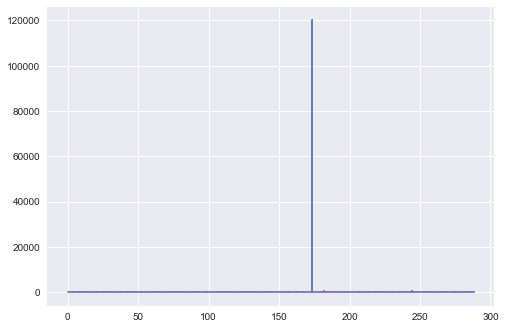

In [87]:
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [88]:
# - plot sale price vs. gr liv area
# - Recommend removing any houses with more than 4000 sq ft from the data set? 

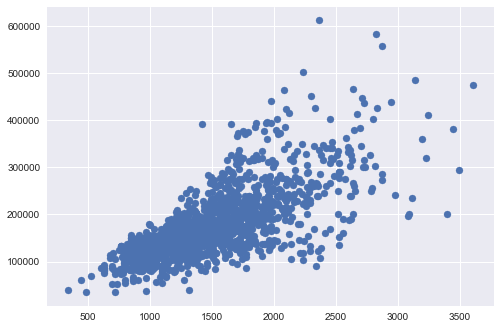

In [89]:
#data.SalePrice

# we should drop these outliers
s1 = plt.scatter(y = data.SalePrice, x= data.GrLivArea, label='Price x Area')
#s11 = plt.scatter(y = data.SalePrice, x= data.OverallQual, label='Price x Yr')

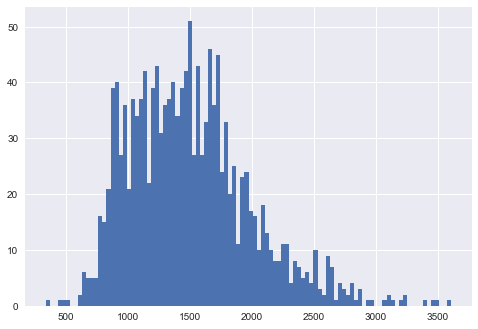

In [90]:
s2 = plt.hist(x= data.GrLivArea, bins = 100, label='Living Area')

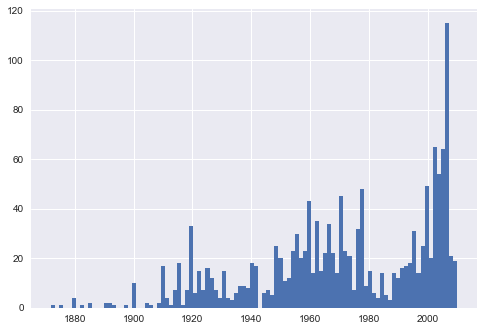

In [91]:
s3 = plt.hist(x= data.YearBuilt, bins = 100, label='Year Built')

In [92]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [93]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0,0.5,'Residuals')

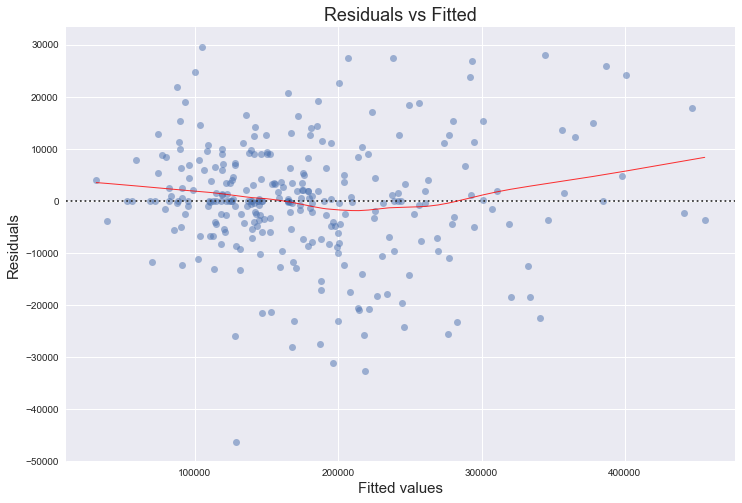

In [94]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_test, data=data,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
# abs_resid = sorted(model_abs_resid)[::-1]
# abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, 
#                                xy=(model_fitted_y[i], 
#                                    model_residuals[i]));

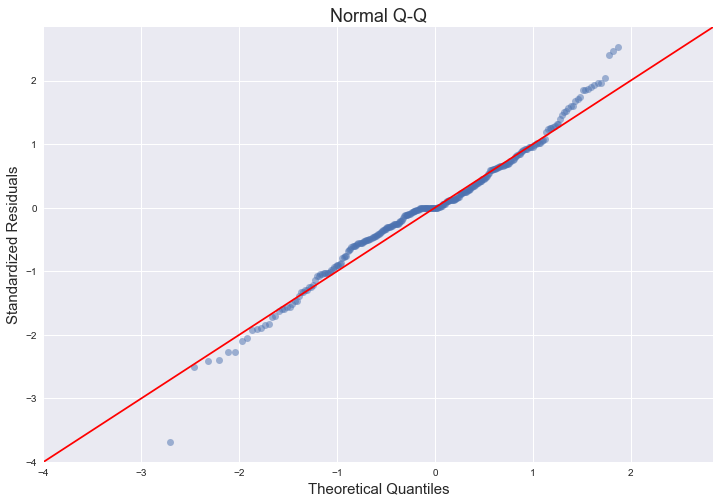

In [95]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
# abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
# abs_norm_resid_top_3 = abs_norm_resid[:3]

# for r, i in enumerate(abs_norm_resid_top_3):
#     plot_lm_2.axes[0].annotate(i, 
#                                xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
#                                    model_norm_residuals[i]));

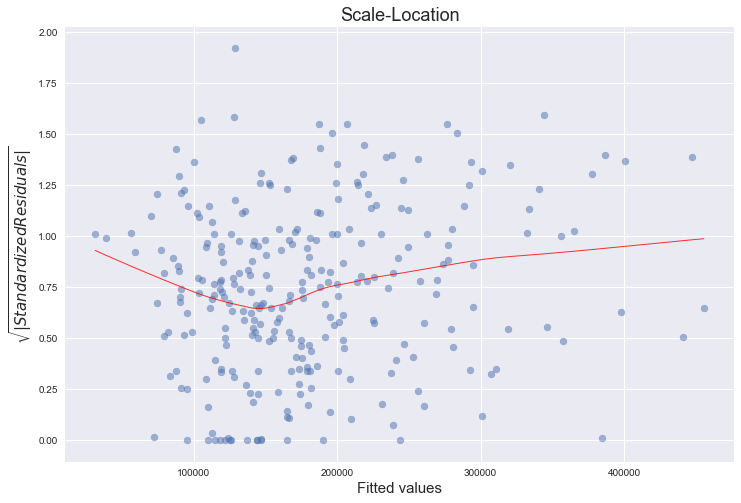

In [96]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
# abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
# abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

# for i in abs_norm_resid_top_3:
#     plot_lm_3.axes[0].annotate(i, 
#                                xy=(model_fitted_y[i], 
#                                    model_norm_residuals_abs_sqrt[i]));

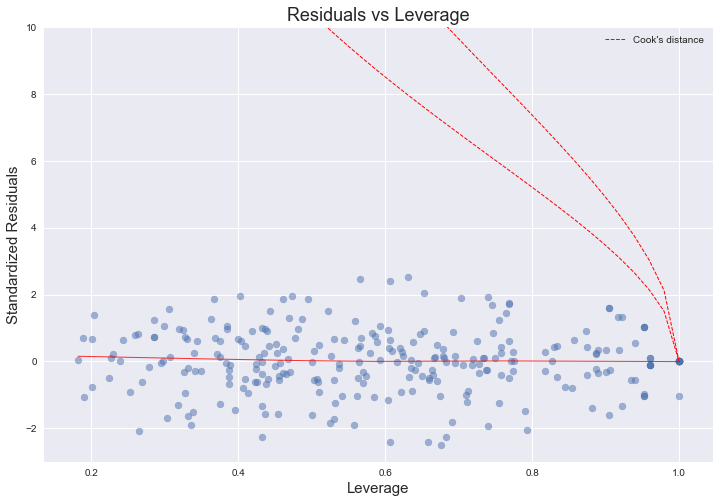

In [97]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

#plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 10)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
# leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

# for i in leverage_top_3:
#     plot_lm_4.axes[0].annotate(i, 
#                                xy=(model_leverage[i], 
#                                    model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 1, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 1, 50)) # 1 line

plt.legend(loc='upper right');

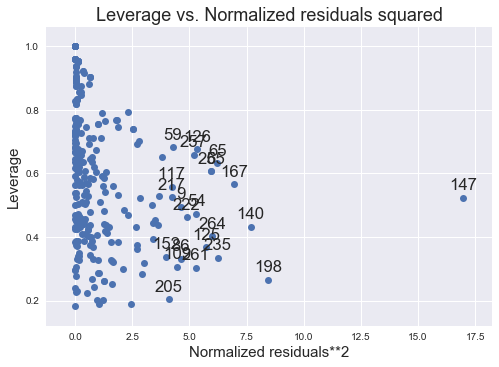

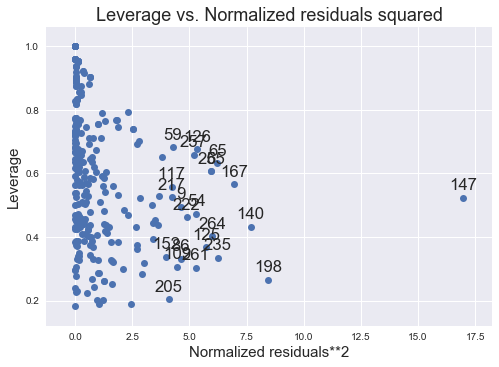

In [98]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
#influence_plot(results)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<StemContainer object of 3 artists>

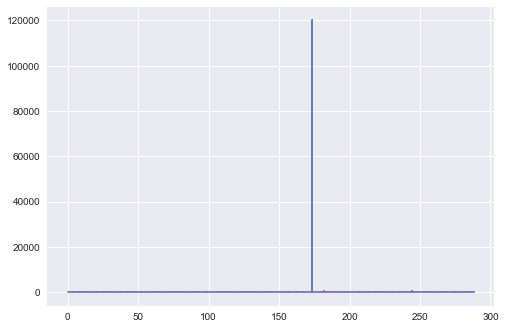

In [99]:
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [100]:
import statsmodels as sm 
from statsmodels.graphics.regressionplots import *


In [101]:
# for i in influence.cooks_distance:
#     list = []
#     for j in i:
#         if j>4/(len(X_test) - p - 1):
#             list.append(j)
#     print(list)

In [102]:
def outliers(data):
    df = pd.DataFrame()
    droppedlist = []
    for i in data:
        list1 = []
        mean = np.mean(data[i])
        sd = np.std(data[i])
        for j in data[i]:
            if j < (mean - 4*sd):
                droppedlist.append(j)
                list1.append("DropRow")
            if j > (mean + 4*sd):
                droppedlist.append(j)
                list1.append("DropRow")
            else:
                list1.append(j)
        df[str(i)] = list1
    return df


In [103]:
#test = data[["LotFrontage", "GrLivArea"]]


cont_list = data[['LotArea','BsmtFinSF1',
                  'BsmtUnfSF','TotalBsmtSF',
                  '1stFlrSF','GrLivArea']]




In [36]:
dropRows = outliers(cont_list)

In [61]:
rowsToDrop = list(dropRows[dropRows['1stFlrSF'] == "DropRow"].index) + list(dropRows[dropRows['GrLivArea'] == "DropRow"].index) + list(dropRows[dropRows['TotalBsmtSF'] == "DropRow"].index) + list(dropRows[dropRows['BsmtUnfSF'] == "DropRow"].index) + list(dropRows[dropRows['BsmtFinSF1'] == "DropRow"].index) + list(dropRows[dropRows['LotArea'] == "DropRow"].index)

In [69]:
drops = list(set(rowsToDrop))
#len(rowsToDrop)

In [71]:
data = data.drop(drops)

In [72]:
data.to_csv('noOutliers.csv', index = False)